## NLP: Pfizer Vaccine Tweets - Sentiment Analysis 
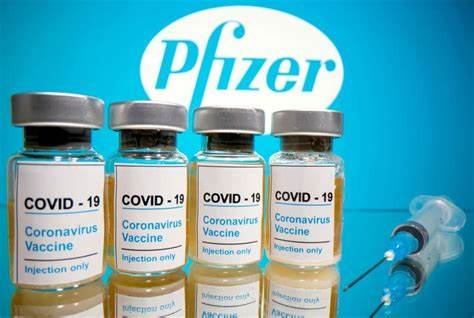
<h2><center>

##### Since Dec. 11, 2020, the Pfizer-BioNTech COVID-19 Vaccine has been available under EUA in individuals 16 years of age and older. On December 9, 2020, Health Canada authorized the Pfizer-BioNTech COVID-19 Vaccine, which was the first COVID-19 vaccine in Canada. On Aug 23, 2021, the FDA also approved Pfizer-BioNTech COVID-19 Vaccine.

##### The data range is from December of 2020 to November of 2021. This research is tying to get a sense of people's opinions to this vaccine by studing the Pfizer vaccine tweets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string
from string import punctuation, digits
import plotly.express as px
from datetime import date
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('vaccination_tweets.csv')

### Exploratory Data Analysis

In [3]:
df.shape

(11020, 16)

In [4]:
df.head(4)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,11020.0,1.372977e+18,3.311622e+16,1.337728e+18,1.347623e+18,1.360274e+18,1.395234e+18,1.463244e+18
user_followers,11020.0,3.518827e+04,2.942509e+05,0.000000e+00,1.110000e+02,4.790000e+02,2.171250e+03,1.371493e+07
user_friends,11020.0,1.170470e+03,2.798430e+03,0.000000e+00,1.640000e+02,4.600000e+02,1.221000e+03,1.032260e+05
user_favourites,11020.0,1.533289e+04,4.944401e+04,0.000000e+00,4.360000e+02,2.323500e+03,1.114075e+04,1.213794e+06
retweets,11020.0,1.360000e+00,1.136000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.780000e+02
favorites,11020.0,7.510000e+00,5.119000e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,2.315000e+03


In [7]:
# Check if there are duplicated rows
df.duplicated().sum()

0

In [8]:
# check if there are missing values
(df.isnull().sum()/len(df)).round(3)

id                  0.000
user_name           0.000
user_location       0.206
user_description    0.062
user_created        0.000
user_followers      0.000
user_friends        0.000
user_favourites     0.000
user_verified       0.000
date                0.000
text                0.000
hashtags            0.234
source              0.000
retweets            0.000
favorites           0.000
is_retweet          0.000
dtype: float64

In [9]:
print(min(df['date'])); print(max(df['date']))

2020-12-12 11:55:28
2021-11-23 20:30:48


In [10]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

count    11020.00
mean         7.01
std          4.19
min          0.00
25%          3.00
50%          8.00
75%         11.00
max         15.00
Name: user_acct_age, dtype: float64


Text(0.5, 1.0, 'Distribution of User Account Age')

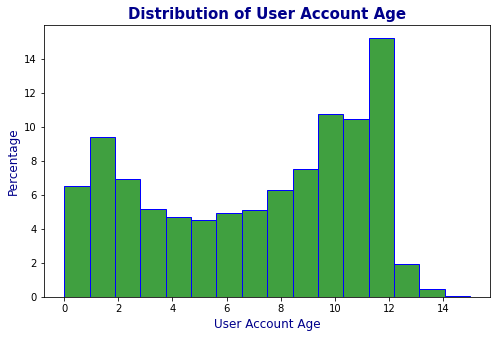

In [11]:
# Caclulate the age of user accounts

df['user_created_year']=pd.to_datetime(df['user_created']).dt.year
#df['today']=pd.to_datetime(date.today())
#df['today']=df['today'].dt.year
#df['user_acct_age']= df['today']-df['user_created_year']
df['tweets_year'] = pd.to_datetime(df['date']).dt.year
df['user_acct_age']= df['tweets_year']-df['user_created_year']

print(df['user_acct_age'].describe().round(2))

plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x="user_acct_age", bins=16,stat='percent',color='green', edgecolor='blue')
ax.set_ylabel('Percentage', color = 'darkblue', fontsize = '12')
ax.set_xlabel('User Account Age', color = 'darkblue', fontsize = '12')
plt.title('Distribution of User Account Age', color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue"> 
    The range of user account age: 0 - 15 yrs old. 
    The median : 8 yrs old.
    The highest percentage: 12 yrs.
    The second and the thrid highest percentage: 10 and 11 yrs.
    It shows long-term user tended to post more tweets.
</span>

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['hour'] = df['date'].dt.hour
#df['year_month'] = pd.PeriodIndex(pd.to_datetime(df[['year','month']].assign(day=1)),freq='M')

Text(0.5, 1.0, 'Hourly Trend')

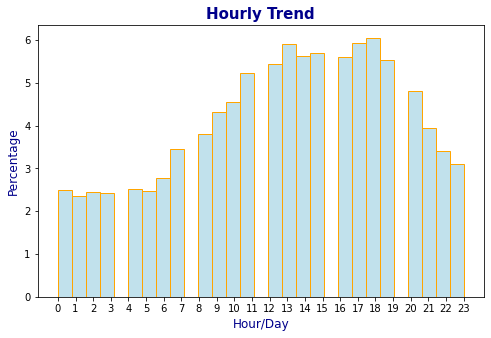

In [13]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x='hour', color = 'lightblue', edgecolor='orange',common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage',  color = 'darkblue', fontsize = '12')
ax.set_xlabel('Hour/Day',  color = 'darkblue', fontsize = '12')
plt.xticks(np.arange(0,24,1))
ax.set_title('Hourly Trend',  color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue"> The most popular time to the tweets was between 11am and 20pm. </span>

Text(0.5, 1.0, 'Weekly Trend')

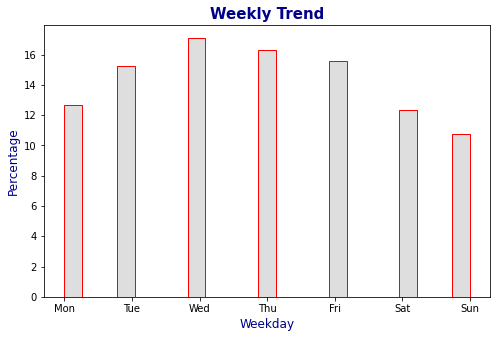

In [14]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x='weekday', color = 'lightgrey', edgecolor='red', common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels([' ', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']) # The weekday number starting at 0 for Mondays
ax.set_ylabel('Percentage',  color = 'darkblue', fontsize = '12')
ax.set_xlabel('Weekday',  color = 'darkblue', fontsize = '12')
ax.set_title('Weekly Trend',  color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue"> The most popular weekdays to the tweets were between Tuesday and Friday. </span>

Text(0.5, 1.0, 'Monthly Trend')

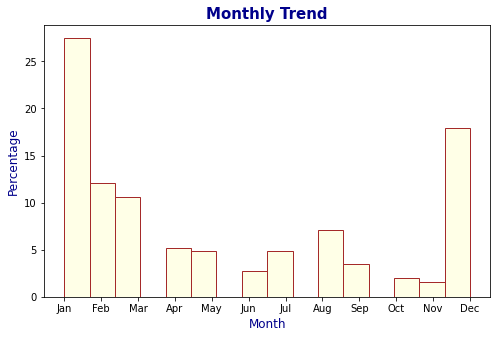

In [15]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x='month', color = 'lightyellow', edgecolor='brown', common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
ax.set_ylabel('Percentage',  color = 'darkblue', fontsize = '12')
ax.set_xlabel('Month',  color = 'darkblue', fontsize = '12')
plt.xticks(np.arange(1,13,1))
ax.set_title('Monthly Trend',  color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue"> The data range is from December of 2020 to November of 2021. The Pfizer vaccine has been available since December of 2020. Most tweets occured between December of 2020 and January of 2021. 
</span>

In [16]:
# Number of unique values of user_location variable
len(df['user_location'].unique())

3137

In [17]:
# Top 10 User locations vs. bottom 10 user locations
print('Top 10 User locations:'); print(df['user_location'].value_counts().nlargest(n=10));
print('Bottom 10 User locations:'); print(df['user_location'].value_counts().nsmallest(n=10))

Top 10 User locations:
Malaysia                168
London, England         142
India                   127
Petaling Jaya           106
London                   95
Canada                   90
Hong Kong                80
United Kingdom           77
Weinheim, Germany        76
United Arab Emirates     73
Name: user_location, dtype: int64
Bottom 10 User locations:
Turkey                         1
New Delhi,India                1
Minnesnowtah                   1
Blue Planet ~ Darug Country    1
Bergamo, Lombardia             1
Klosterneuburg, Österreich     1
Displaced                      1
Reykjavik                      1
Bochum, Germany                1
Temecula, CA                   1
Name: user_location, dtype: int64


Verified Accounts :  Counter({False: 10084, True: 936})


Text(0.5, 1.0, 'Verified Accounts vs. Unverified Accounts')

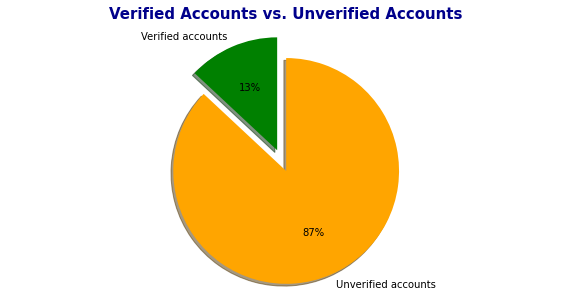

In [18]:
# verified accounts vs. unverified accounts

print('Verified Accounts : ', Counter(df['user_verified'])); 
labels = 'Unverified accounts', 'Verified accounts'
sizes = [2000, 300] 
explode_val = (0.2, 0)  
plt.figure(figsize=(10,5))
colors_list = ['orange', 'green']
plt.pie(sizes, explode=explode_val, labels=labels, colors = colors_list, autopct='%.0f%%',
        shadow=True, startangle=90, counterclock=False);
plt.axis('equal')
plt.title("Verified Accounts vs. Unverified Accounts", color = 'darkblue', fontweight = 'bold', fontsize = '15')

count    11020.00
mean         1.93
std          1.73
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         11.00
Name: hashtag_count, dtype: float64


Text(0.5, 1.0, 'Distribution of Hashtag Count')

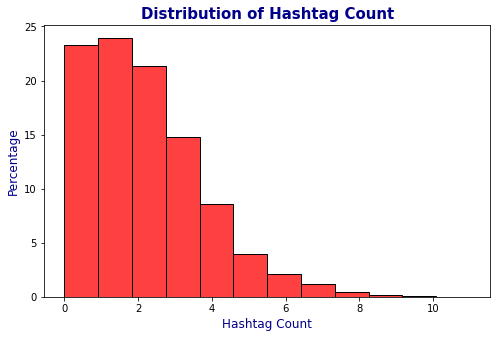

In [19]:
'''
A hashtag is any word or phrase immediately preceded by the # symbol. When you click or tap on a hashtag, 
you'll see other Tweets containing the same keyword or topic.
'''
#Hashtags count
df['hashtag_count'] = df['text'].apply(lambda h:h.count('#'))
print(df['hashtag_count'].describe().round(2))

plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x="hashtag_count", bins=12,stat='percent',color='red')
ax.set_ylabel('Percentage', color = 'darkblue', fontsize = '12')
ax.set_xlabel('Hashtag Count', color = 'darkblue', fontsize = '12')
plt.title('Distribution of Hashtag Count', color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue"> Hashtage count range: 0 - 11. The median is 2. Most tweets had zero or one hashtag. </span>

count    11020.00
mean         0.44
std          1.00
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         12.00
Name: mention_count, dtype: float64


Text(0.5, 1.0, 'Distribution of Mention Count')

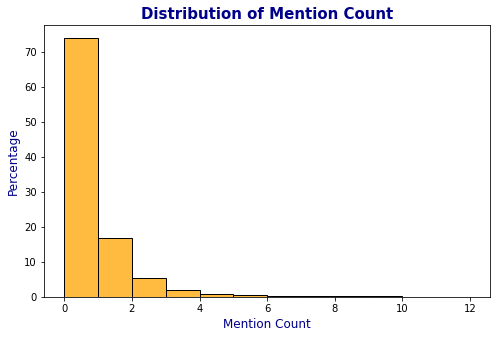

In [20]:
'''
Mentioning other accounts in your Tweet by including the @ sign followed directly by their username is called a “mention”. 
Also refers to Tweets in which your @username was included. People will use your @username to mention you in Tweets, 
send you a message or link to your profile.
'''
# Mention count
df['mention_count'] = df['text'].apply(lambda m:m.count('@'))
print(df['mention_count'].describe().round(2))

plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x="mention_count", bins=12, stat='percent',color='Orange')
ax.set_ylabel('Percentage', color = 'darkblue', fontsize = '12')
ax.set_xlabel('Mention Count', color = 'darkblue', fontsize = '12')
plt.title('Distribution of Mention Count', color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue"> mention count range: 0 - 12. The median is 0. Most tweets had zero mentioning.</span>

Text(0.5, 1.0, 'Distribution of User Class')

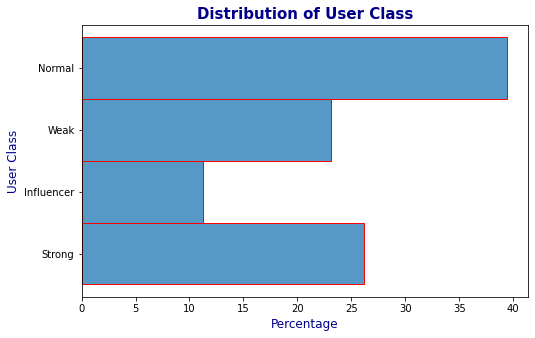

In [21]:
# Define a function to create user class based on the nubmer of user followers

def getclass (n):
 if n <= 100:
  return 'Weak'
 elif n <= 1000:
  return 'Normal'
 elif n <= 10000:
  return 'Strong'
 else:
  return 'Influencer'

# Call the function
df['user_class'] = df['user_followers'].apply(getclass)

plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, y="user_class", stat='percent', edgecolor='red')
ax.set_xlabel('Percentage', color = 'darkblue', fontsize = '12')
ax.set_ylabel('User Class', color = 'darkblue', fontsize = '12')
ax.set_title ("Distribution of User Class", color = 'darkblue',  fontweight = 'bold', fontsize = '15')

<span style="color:darkblue"> Percentage of User Class: Normal > Strong > Weak > Influencer </span>

## Clean the text by removing extra characters

In [22]:
# Convert all the text to the lower case
df['revtext'] = df['text'].str.lower()

# Remove tag
df['revtext']  = df['revtext'].apply(lambda x: re.sub('<.*?>','',x))

# Remove mention
df['revtext'] = df['revtext'].apply(lambda x: re.sub(r'@\w+','',x))

# Remove hash
df['revtext'] = df['revtext'].apply(lambda x: re.sub(r'#\w+','',x))

# Remove newline
df['revtext'] = df['revtext'].apply(lambda x:re.sub('\n','',x))

# Remove numbers
df['revtext'] = df['revtext'].apply(lambda x: re.sub(r'[0-9]+','',x))

# Remove url
df['revtext'] = df['revtext'].apply(lambda x:  re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',x))

# Remove punctuation
df['revtext'] = df['revtext'].apply(lambda x: re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',x))

# Text strip 
df['revtext'] = df['revtext'].apply(lambda x: re.sub('\s{2,}', ' ', x.strip()))

count    11020.00
mean        12.89
std          5.36
min          1.00
25%          9.00
50%         14.00
75%         17.00
max         27.00
Name: text_len, dtype: float64


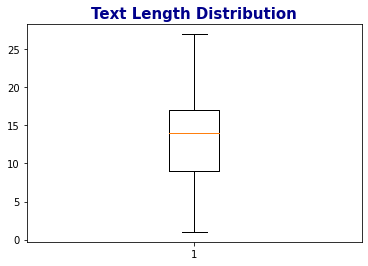

In [23]:
# Cleaned text length
df['text_len']=df['revtext'].str.split().map(lambda x: len(x))
print(df['text_len'].describe().round(2))

fig, ax = plt.subplots()
ax.boxplot(df['text_len'])
plt.title('Text Length Distribution', color = 'darkblue', fontweight = 'bold', fontsize = '15')
plt.show()

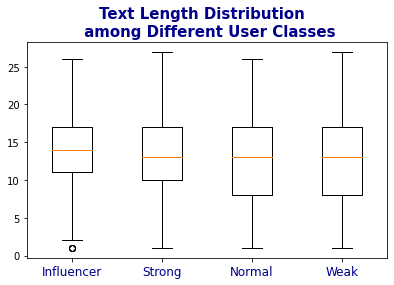

In [24]:
I_texlen = df.query("user_class == 'Influencer'") ["text_len"].values
S_texlen = df.query("user_class == 'Strong'") ["text_len"].values
N_texlen = df.query("user_class == 'Normal'") ["text_len"].values
W_texlen = df.query("user_class == 'Weak'") ["text_len"].values

Categories = [I_texlen, S_texlen, N_texlen, W_texlen]
 
fig = plt.figure(figsize =(5, 3)) 
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(Categories)
ax.set_xticklabels(['Influencer', 'Strong', 'Normal', 'Weak'], color = 'darkblue', fontsize = '12')
plt.title('Text Length Distribution  \n among Different User Classes', color = 'darkblue', fontweight = 'bold', fontsize = '15')
plt.show()

<span style="color:darkblue"> All are in normal distribution. 
The interquartile range (IQR): Weak > Normal > Strong > Influencer. 
The median: Influencer is the largest. The user class of influcencer and strong tended to post more words than othe class users. </span>

In [25]:
# Append new words to the default stopwords from wordcloud
stopwords_newlist = STOPWORDS.update(['pfizer', 'pfizerbiontech', 'Pfizer-bioNtech', 'covid', 'covid19', 'covid_19', 
                                      'covid-19', 'vaccine', 'vaccination', 'hashtags', 'coronavirus', 'bha', 'blah'])

In [27]:
# Define a function to show word cloud
def word_cloud (column, bkcolor='white', fcolor='orange', title=None):
    wordcloud = WordCloud(background_color=bkcolor, stopwords = stopwords_newlist, 
        max_words=50, max_font_size=30, scale=5, 
        random_state=123).generate(str(column.dropna()))

    fig = plt.figure(1, figsize=(10,10), facecolor = fcolor)
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

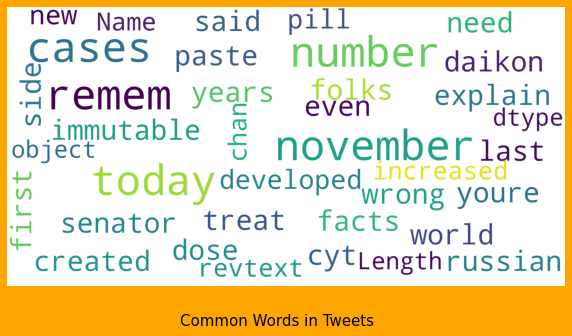

In [28]:
word_cloud(df['revtext'], title = 'Common Words in Tweets')

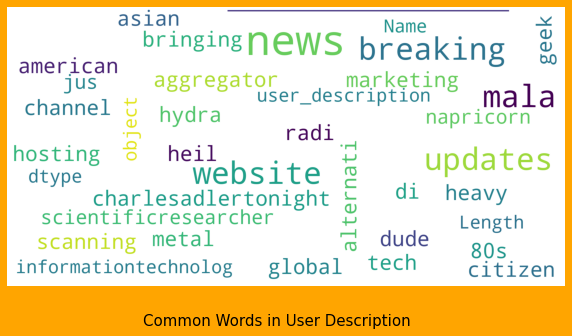

In [29]:
word_cloud(df['user_description'].str.lower(), title = 'Common Words in User Description')

<span style="color:darkblue"> 
    The words (e.g.'instagram', 'facebook', 'website', 'network') indiciate most users had more than one social media. Other words (e.g. 'american', 'asian', 'eastern', 'malyasia', 'global') suggest users were from all over the world.     
</span>

### Overall Sentiment Analysis

In [30]:
pd.set_option('display.max_colwidth', None)
df['revtext']

0                                                                same folks said daikon paste could treat a cytokine storm
1        while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev…
2                                                                                russian vaccine is created to last years…
3             facts are immutable senator even when youre not ethically sturdy enough to acknowledge them you were born i…
4                                                                              explain to me again why we need a vaccine …
                                                               ...                                                        
11015              the number of covid cases today november remember to observe safety and protective measures when you’r…
11016                                                                                                         first dose ✅
11017           

In [31]:
SIA = SentimentIntensityAnalyzer()
#df['scores'] = df['revtext'].apply(lambda word: SIA.polarity_scores(word))
df['neg_score'] = df['revtext'].apply(lambda word: SIA.polarity_scores(word).get('neg'))
df['neu_score'] = df['revtext'].apply(lambda word: SIA.polarity_scores(word).get('neu'))
df['pos_score'] = df['revtext'].apply(lambda word: SIA.polarity_scores(word).get('pos'))
df['compound_score'] = df['revtext'].apply(lambda word: SIA.polarity_scores(word).get('compound'))

# The value of compound score is between -1 to 1. The larger the absolute value, the stronger the sentiment.

df[['revtext','neg_score','neu_score','pos_score','compound_score']].head(7)

,revtext,neg_score,neu_score,pos_score,compound_score
0,same folks said daikon paste could treat a cytokine storm,0.000,0.769,0.231,0.4019
1,while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev…,0.130,0.756,0.113,-0.1027
2,russian vaccine is created to last years…,0.000,0.750,0.250,0.2500
3,facts are immutable senator even when youre not ethically sturdy enough to acknowledge them you were born i…,0.000,1.000,0.000,0.0000
4,explain to me again why we need a vaccine …,0.000,1.000,0.000,0.0000
5,does anyone have any useful adviceguidance for whether the covid vaccine is safe whilst breastfeeding…,0.000,0.691,0.309,0.7003
6,it is a bit sad to claim the fame for success of on patriotic competition between usa canada uk and…,0.116,0.637,0.247,0.5423


In [32]:
df['sentiment'] = df['compound_score'].apply(lambda x:'Negative'if x<0 else ('Neutral' if x==0 else 'Positive'))
df[['revtext', 'compound_score', 'sentiment']].head(7)

,revtext,compound_score,sentiment
0,same folks said daikon paste could treat a cytokine storm,0.4019,Positive
1,while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev…,-0.1027,Negative
2,russian vaccine is created to last years…,0.2500,Positive
3,facts are immutable senator even when youre not ethically sturdy enough to acknowledge them you were born i…,0.0000,Neutral
4,explain to me again why we need a vaccine …,0.0000,Neutral
5,does anyone have any useful adviceguidance for whether the covid vaccine is safe whilst breastfeeding…,0.7003,Positive
6,it is a bit sad to claim the fame for success of on patriotic competition between usa canada uk and…,0.5423,Positive


Text(0.5, 1.0, 'Distribution of Sentiment')

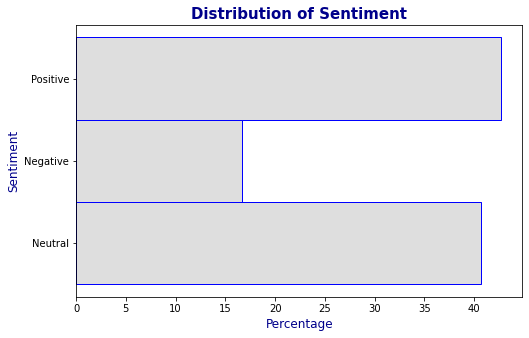

In [33]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, y="sentiment", stat='percent', color = 'lightgrey', edgecolor= 'blue')
ax.set_xlabel('Percentage', color = 'darkblue', fontsize = '12')
ax.set_ylabel('Sentiment', color = 'darkblue', fontsize = '12')
ax.set_title ("Distribution of Sentiment", color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue"> Percentage of Sentiment: Positive > Neutral > Negative. The percentage of postive sentiment is more than doulbe of the percentage of negative sentiment.  
</span>

In [34]:
df.pivot_table(index=['year', 'month'], values='compound_score', aggfunc=np.mean).rename(
    columns={'compound_score': 'mean of compound scores'})

mean of compound scores
year month                         
2020 12                    0.136482
2021 1                     0.118712
     2                     0.148430
     3                     0.176389
     4                     0.154614
     5                     0.166417
     6                     0.197392
     7                     0.145427
     8                     0.171124
     9                     0.093457
     10                    0.112984
     11                    0.156954

<span style="color:darkblue"> All the mean of compound scores are slightly postive. The range is 0.093457 - 0.197392. </span>

In [35]:
df.pivot_table(index=['user_class', 'user_verified'], values='compound_score', aggfunc=np.mean).rename(
    columns={'compound_score': 'mean of compound scores'})

mean of compound scores
user_class user_verified                         
Influencer False                         0.168897
           True                          0.101899
Normal     False                         0.158289
           True                          0.247033
Strong     False                         0.125418
           True                          0.070342
Weak       False                         0.145096
           True                          0.385850

<span style="color:darkblue"> 
    All the mean of compound scores are slightly postive. 
    The range is 0.070342 - 0.385850. 
    In the user class of Influencer, Normal, and Strong: unverifed accounts's mean > verifed accounts's mean. 
    In the user class of Weak: verifed accounts's mean > unverifed accounts's mean. 
</span>

Text(0.5, 1.0, 'Distribution of User Account Age \n among Different Sentiment Group')

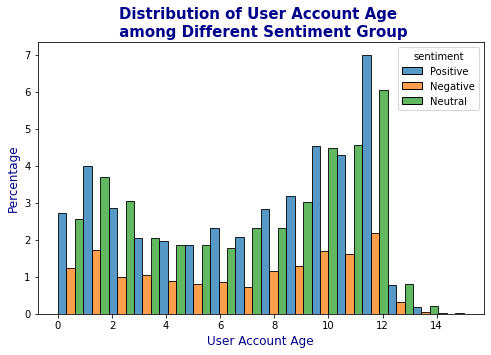

In [36]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x="user_acct_age", hue='sentiment', bins=16, multiple='dodge', stat='percent')
ax.set_ylabel('Percentage', color = 'darkblue', fontsize = '12')
ax.set_xlabel('User Account Age', color = 'darkblue', fontsize = '12')
plt.title('Distribution of User Account Age \n among Different Sentiment Group', color = 'darkblue', 
          fontweight = 'bold', fontsize = '15')

<span style="color:darkblue">
    Positive and negative sentiments were patically high for the 12-yr user account.     
</span>

Text(0.5, 1.0, 'Monthly Trend of Different Sentiment Group')

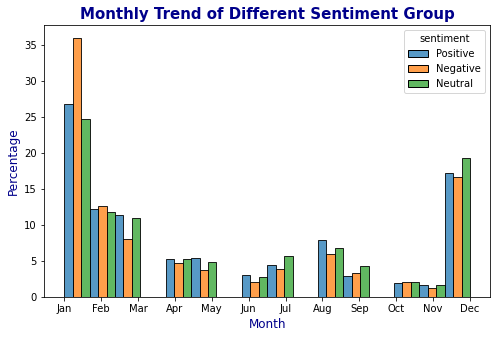

In [37]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x='month', hue='sentiment', common_norm=False, stat='percent',multiple='dodge')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
ax.set_ylabel('Percentage',  color = 'darkblue', fontsize = '12')
ax.set_xlabel('Month',  color = 'darkblue', fontsize = '12')
plt.xticks(np.arange(1,13,1))
ax.set_title('Monthly Trend of Different Sentiment Group',  color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue">
Negative Sentiment reached the highest percentage in January of 2021.     
</span>

       compound_score
count         4707.00
mean             0.49
std              0.21
min              0.00
25%              0.36
50%              0.48
75%              0.64
max              0.99


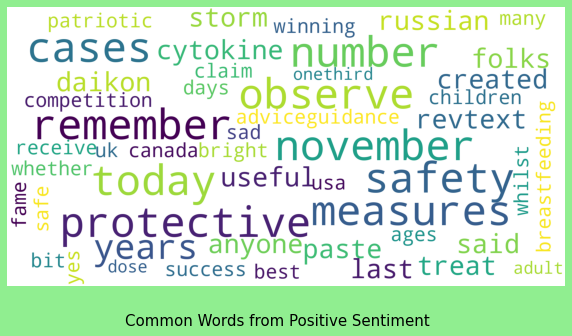

In [38]:
print(df.loc[df['sentiment']=='Positive', ['compound_score']].describe().round(2))

word_cloud(df.loc[df['sentiment']=='Positive', ['revtext']], fcolor='lightgreen',
           title = 'Common Words from Positive Sentiment')

<span style="color:darkblue"> The mean and the median are all close to 0.5, which shows people were moderately positive in the positive sentiment group. The maximum is 0.9936. 
    Postive words in wordcloud (e.g. protective, useful, success, winning, bright, best) </span>

       compound_score
count         1834.00
mean            -0.41
std              0.20
min             -0.97
25%             -0.56
50%             -0.38
75%             -0.27
max             -0.02


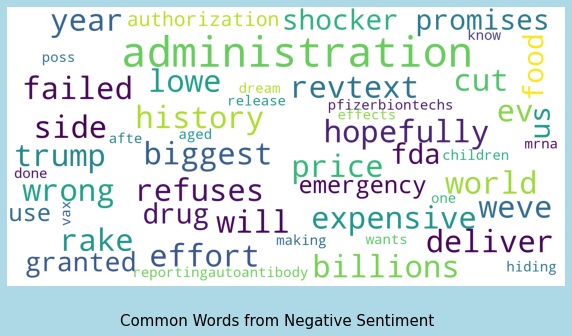

In [39]:
print(df.loc[df['sentiment']=='Negative', ['compound_score']].describe().round(2))

word_cloud(df.loc[df['sentiment']=='Negative', ['revtext']], fcolor='lightblue',
           title = 'Common Words from Negative Sentiment')

<span style="color:darkblue"> 
    The mean is -0.405 and the median is -0.3818, which suggests people were faily negative in the negative sentiment group.
    The minimum value is -0.9721.
    Negative words in wordcloud (e.g. wrong, expensive, failed, aged, side effects) </span>

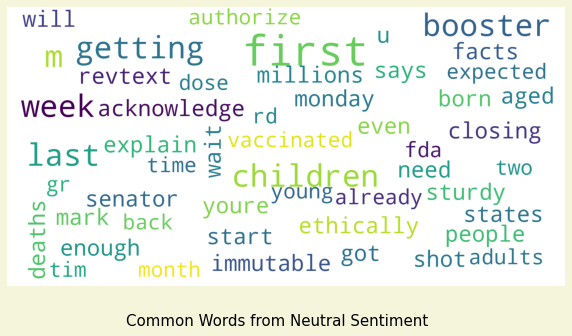

In [40]:
word_cloud(df.loc[df['sentiment']=='Neutral', ['revtext']], fcolor='beige',title = 'Common Words from Neutral Sentiment')

### Nagtive Sentiment Analysis

In [47]:
df_neg = df[df['sentiment']=='Negative']

Text(0.5, 1.0, 'Distribution of User Account Age \n in The Negative Sentiment Group')

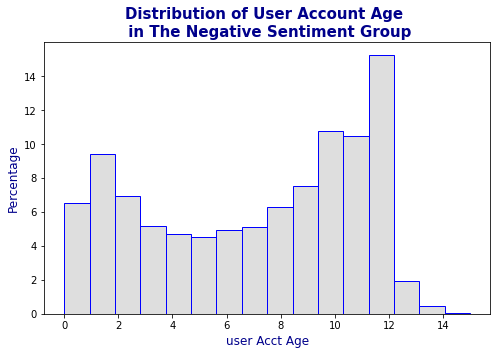

In [48]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x="user_acct_age", bins=16,stat='percent',color='lightgrey', edgecolor= 'blue')
ax.set_ylabel('Percentage', color = 'darkblue', fontsize = '12')
ax.set_xlabel('user Acct Age', color = 'darkblue', fontsize = '12')
plt.title('Distribution of User Account Age \n in The Negative Sentiment Group', color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue">
The distribution of user account age in the negative sentiment group is consitent with the overall ditribution. 
</span>

Text(0.5, 1.0, 'Distribution of User Class \n in The Negative Sentiment Group')

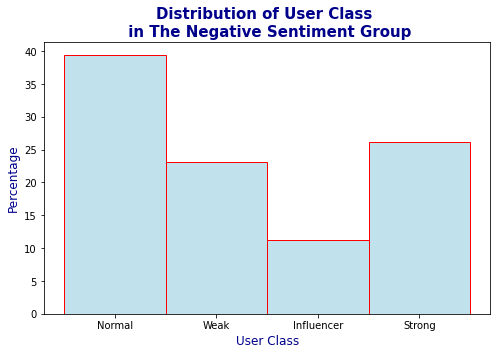

In [49]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df, x="user_class", bins=4,stat='percent',color='lightblue', edgecolor='red')
ax.set_ylabel('Percentage', color = 'darkblue', fontsize = '12')
ax.set_xlabel('User Class', color = 'darkblue', fontsize = '12')
plt.title('Distribution of User Class \n in The Negative Sentiment Group', color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue">
The distribution of user class in the negative sentiment group is consitent with the overall ditribution. 
</span>

In [50]:
# Top 10 User locations vs. bottom 10 user locations
print('Top 10 User locations -- negative sentiment group:'); print(df_neg['user_location'].value_counts().nlargest(n=10));
print('Bottom 10 User locations -- negative sentiment group:'); print(df_neg['user_location'].value_counts().nsmallest(n=10))

Top 10 User locations -- negative sentiment group:
India                   30
Hong Kong               26
London, England         25
Malaysia                21
#KeepFightingMichael    20
Canada                  19
Mumbai, India           16
United Kingdom          15
New Delhi, India        14
Türkiye                 13
Name: user_location, dtype: int64
Bottom 10 User locations -- negative sentiment group:
Wales, UK                       1
United States 🇺🇸                1
Sacramento, CA                  1
Brüssel, Belgien                1
Toronto                         1
lantern waste                   1
Deutschland                     1
Dalfsen                         1
Bramhall, Stockport England     1
Ukraine                         1
Name: user_location, dtype: int64


Text(0.5, 1.0, 'Monthly Trend -- Neative Sentiment Group')

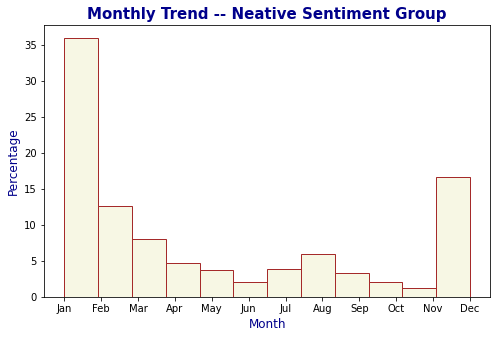

In [51]:
plt.figure(figsize=(8,5))
ax=sns.histplot(data=df_neg, x='month', color = 'beige', edgecolor='brown', common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
ax.set_ylabel('Percentage',  color = 'darkblue', fontsize = '12')
ax.set_xlabel('Month',  color = 'darkblue', fontsize = '12')
plt.xticks(np.arange(1,13,1))
ax.set_title('Monthly Trend -- Neative Sentiment Group',  color = 'darkblue', fontweight = 'bold', fontsize = '15')

<span style="color:darkblue">Negative Sentiment incresed significantly between December of 2020 and November of 2021 as Pfizer Covid-19 Vaccine became avlable in December of 2020.</span>